# Simulating Millikan Oil Drop Data

This notebook is intended to demonstrate the importance of good data in the Millikan oil drop experiment. What makes the data good? Let's explore that. A few things to consider: uncertainty on rise/fall velocities (related to how many up/down tracks you get), number of drops, charge per drop.

I will do a simple approximation to the uncertainty here. Rather than a full error propagation, I will assume there is fractional uncertainty due to the velocities, and "other" fractional uncertainty due to everything else. I will assume these fractional uncertainties add in quadrature. This is NOT a complete error analysis, but it should demonstrate the rough trends.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
qe = 1.602e-19  # charge of electron in Coulombs

In [3]:
def sim_drops(N_drops=20, v_unc=0.1, other_unc=0.03, trials_per_drop=10,
              N_elec_min=1, N_elec_max=5, plot=False):
    """
    Create a simulated set of data for the Millikan oil drop experiment.
    
    Parameters
    ----------
    N_drops : int
        Number of oil drops to simulate. Default is 20
    v_unc : float
        Fractional uncertainty on velocity. Default is 0.1 (10%).
    other_unc : float
        Fractional uncertainty on other parameters. Default is 0.03 (3%).
    trials_per_drop : int or float
        Average number of up/down trials per oil drop. Default is 10.
    N_elec_min : int
        Minimum number of electrons to capture. Default is 1.
    N_elec_max : int
        Maximum number of electrons to capture. Default is 5.
    plot : bool
        If True, plot the simulated data. Default is False

    Returns
    -------
    charge_data : array of float
        Simulated measured charges. Length = N_drops.
    charge_unc : array of float
        Simulated uncertainty on charge data. Length = N_drops.
    true_charges : array of int
        The true charge on each drop. Length N_drops.
    """

    qe = 1.602e-19  # charge of electron in Coulombs
    true_charges = qe * np.random.randint(N_elec_min, N_elec_max, size=N_drops)
    charge_unc = true_charges * np.sqrt(v_unc**2 / trials_per_drop + other_unc**2)
    charge_data = true_charges + charge_unc * np.random.randn(N_drops)
    if plot:
        plt.figure()
        plt.errorbar(np.arange(len(charge_data)), charge_data, yerr=charge_unc, ls='none')
        plt.plot(charge_data, 'o', color='C0')
        plt.xlabel('Droplet number')
        plt.ylabel('Measured Charge (C)')
    return charge_data, charge_unc, true_charges

<IPython.core.display.Javascript object>


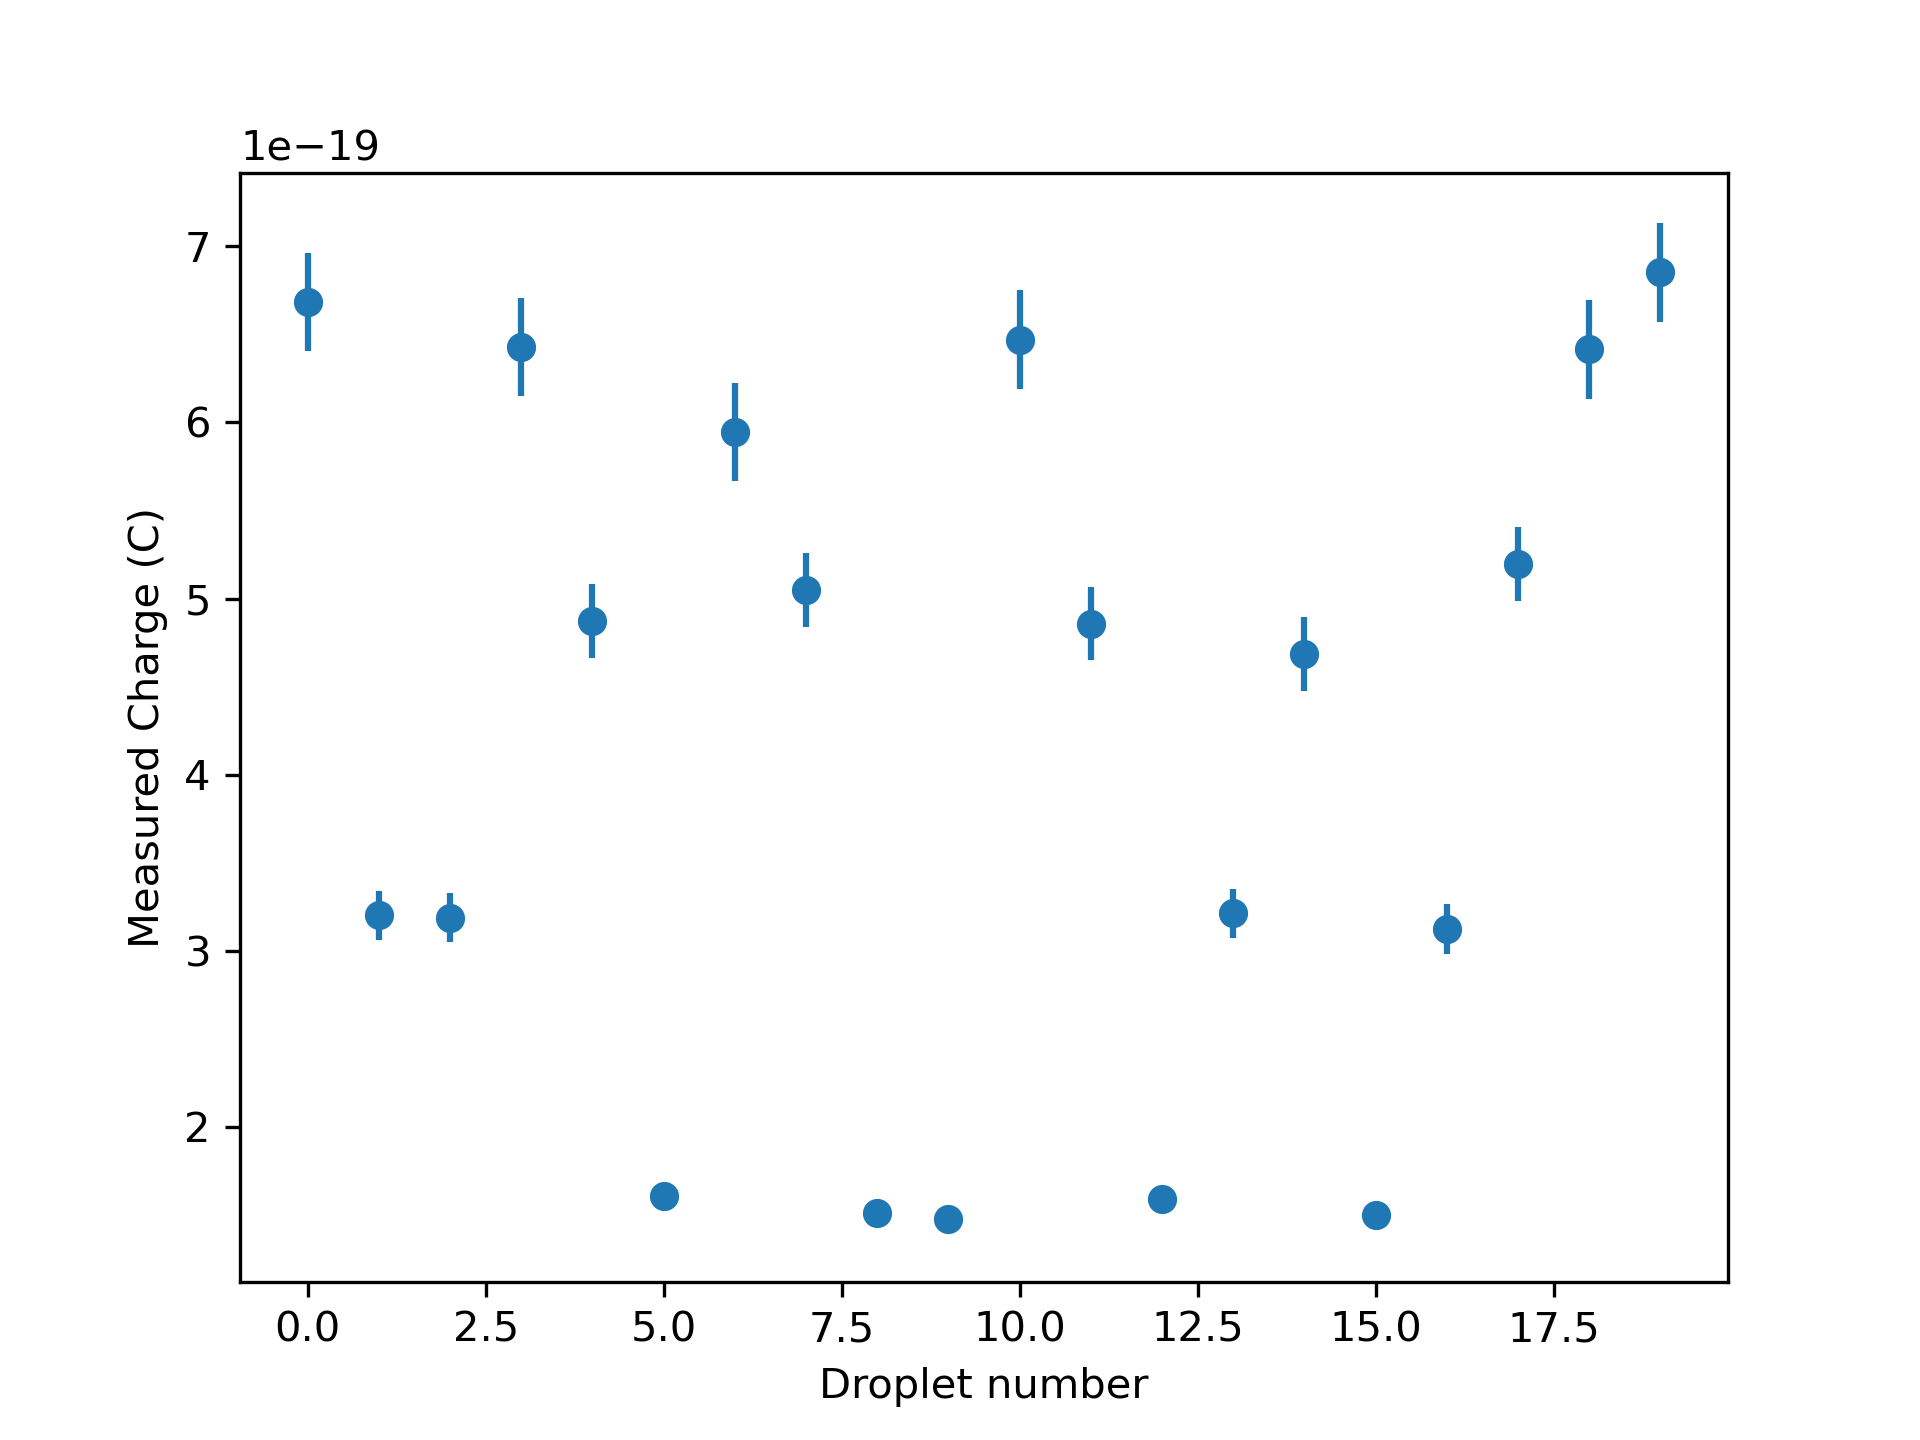

In [4]:
charge_data, charge_unc, true_charges = sim_drops(N_drops=20, v_unc=0.1, other_unc=0.03,
                                                  trials_per_drop=10, N_elec_min=1,
                                                  N_elec_max=5, plot=True)

<IPython.core.display.Javascript object>


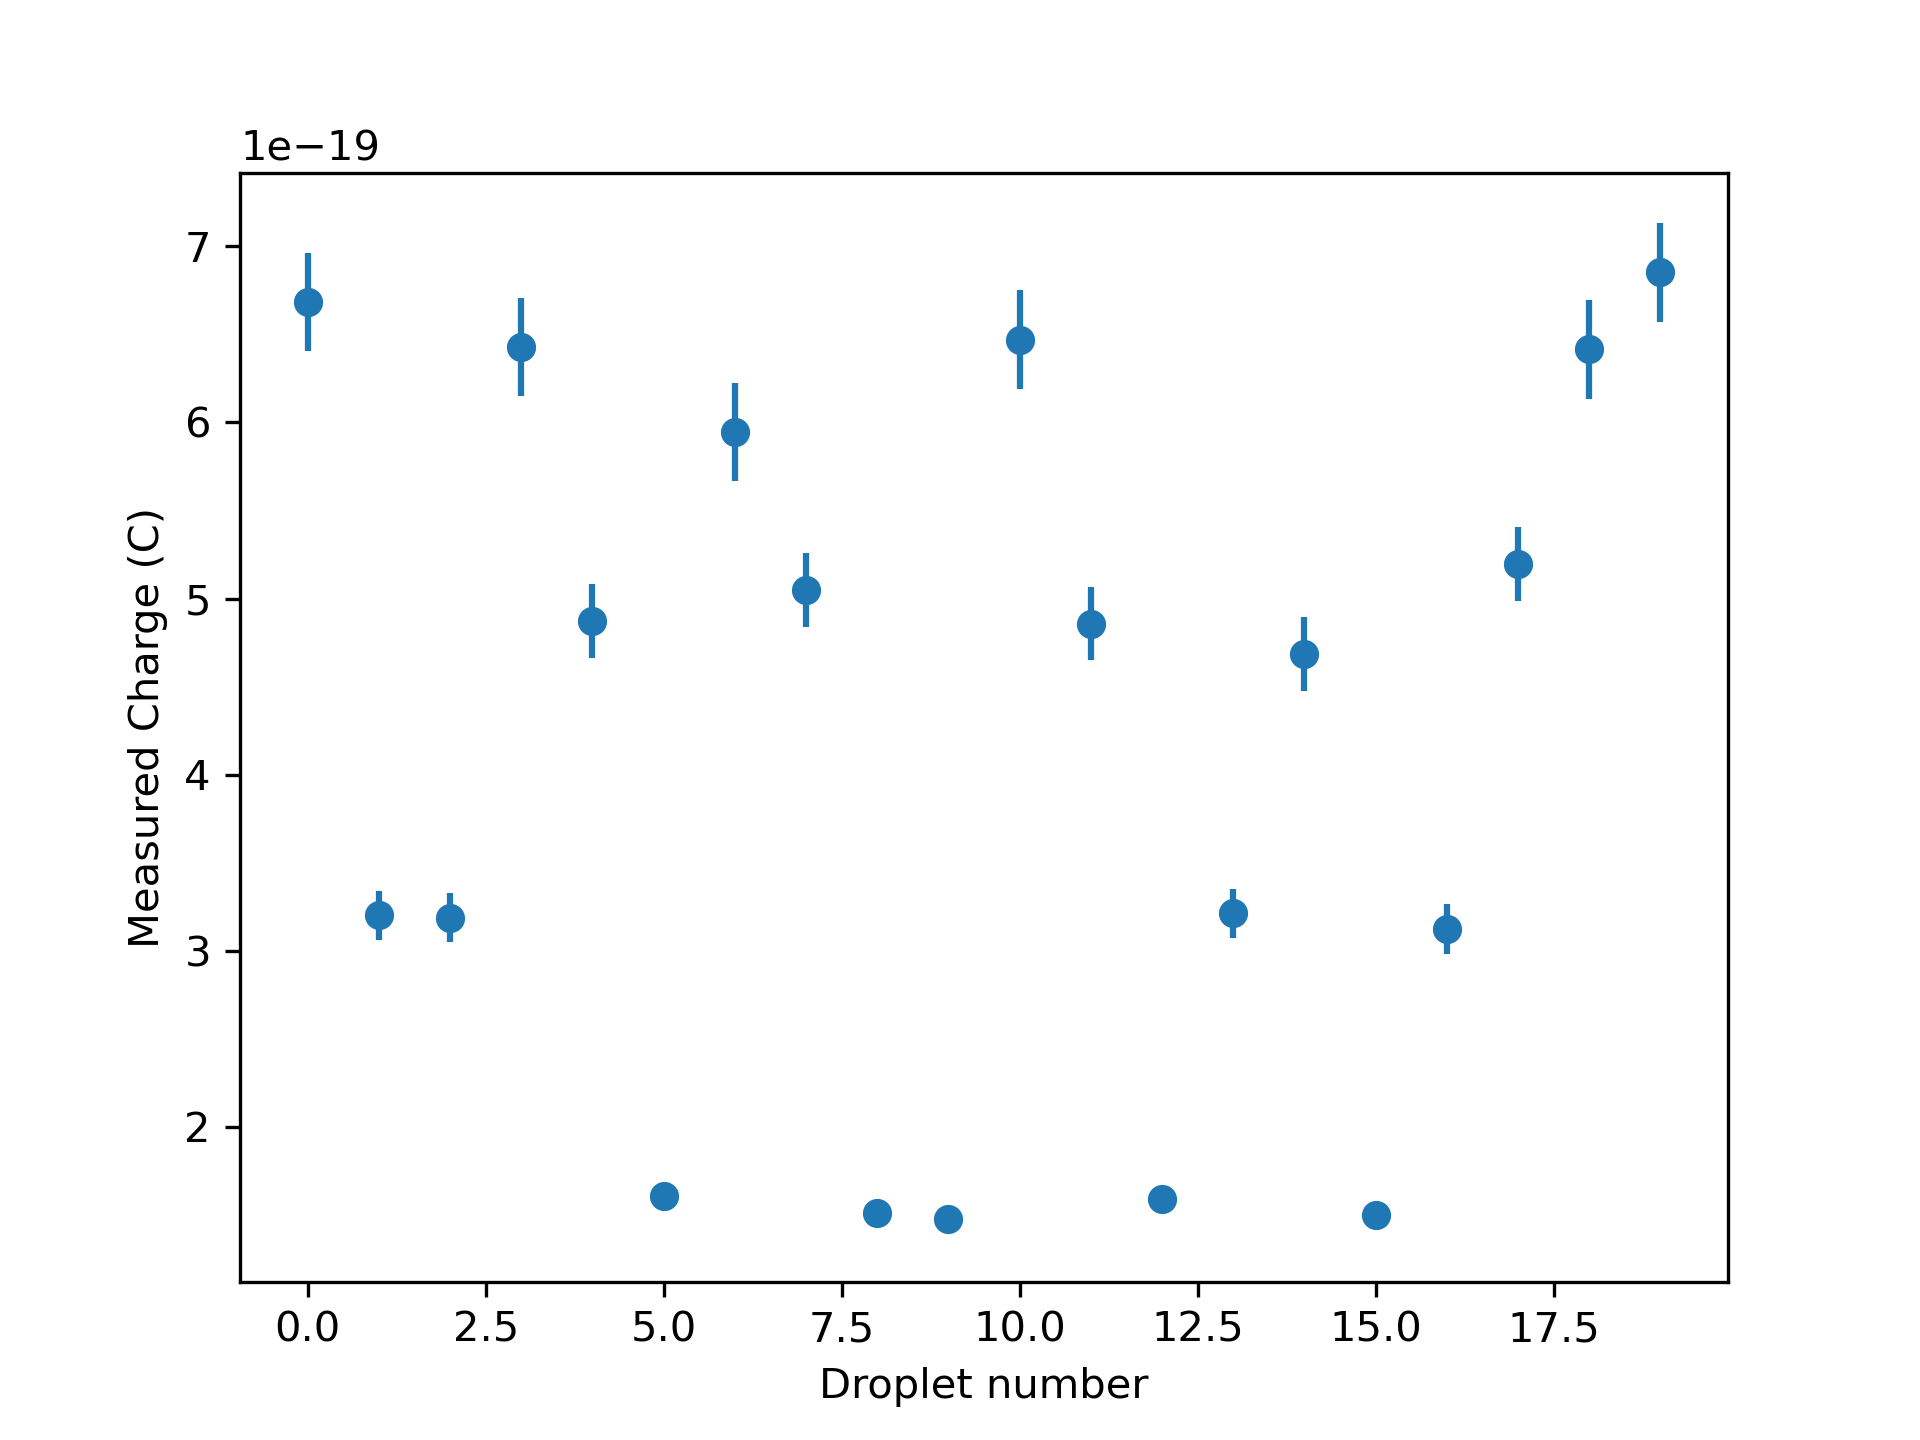

Text(0, 0.5, 'Measured Charge (C)')

In [5]:
plt.figure()
plt.errorbar(np.arange(len(charge_data)), charge_data, yerr=charge_unc, ls='none')
plt.plot(charge_data, 'o', color='C0')
plt.xlabel('Droplet number')
plt.ylabel('Measured Charge (C)')

In [6]:
charge_data / qe

array([4.17305626, 1.9992257 , 1.99064938, 4.01339002, 3.0406912 ,
       1.00469252, 3.71057301, 3.15280565, 0.94493274, 0.92260527,
       4.03925509, 3.03257888, 0.99168856, 2.00564573, 2.92612274,
       0.93668752, 1.94977998, 3.24399437, 4.00397597, 4.27723326])